# Setup

In [1]:
# Setup plotting
import matplotlib.pyplot as plt

# plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

In [2]:
# Wine Data Setup

import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('DATA/red-wine.csv')

# Create training and validation splits
wine_train = red_wine.sample(frac=0.7, random_state=0)
wine_valid = red_wine.drop(wine_train.index)
display(wine_train.head(4))

# Scale to [0, 1]
max_ = wine_train.max(axis=0)
min_ = wine_train.min(axis=0)
wine_train = (wine_train - min_) / (max_ - min_)
wine_valid = (wine_valid - min_) / (max_ - min_)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [3]:
# Fuel data setup

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

fuel = pd.read_csv('DATA/fuel.csv')

X_fuel = fuel.copy()
display(pd.DataFrame(X_fuel).head())
# Remove target
y_fuel = X_fuel.pop('FE')

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse_output=False),
     make_column_selector(dtype_include=object)),
)

X_fuel = preprocessor.fit_transform(X_fuel)
y_fuel = np.log(y_fuel) # log transform target instead of standardizing

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


In [4]:
# Spotify data setup

import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

spotify = pd.read_csv('DATA/spotify.csv')

X_spot = spotify.copy().dropna()
y_spot = X_spot.pop('track_popularity')
artists = X_spot['track_artist']

features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']
features_cat = ['playlist_genre']

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

# We'll do a "grouped" split to keep all of an artist's songs in one
# split or the other. This is to help prevent signal leakage.
def group_split(X, y, group, train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train, test = next(splitter.split(X, y, groups=group))
    return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

X_train__spot, X_valid__spot, y_train__spot, y_valid__spot = group_split(X_spot, y_spot, artists)

X_train__spot = preprocessor.fit_transform(X_train__spot)
X_valid__spot = preprocessor.transform(X_valid__spot)
y_train__spot = y_train__spot / 100 # popularity is on a scale 0-100, so this rescales to 0-1.
y_valid__spot = y_valid__spot / 100

display(pd.DataFrame(X_spot).head())

2024-05-06 01:43:57.907994: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-06 01:43:57.922717: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-06 01:43:57.972676: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-06 01:43:59.215824: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


,track_id,track_name,track_artist,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


## Ionosphere

The [Ionosphere](https://archive.ics.uci.edu/ml/datasets/Ionosphere) dataset contains features obtained from radar signals focused on the ionosphere layer of the Earth's atmosphere. An ML task could determine whether the signal shows the presence of some object, or just empty air.

In [5]:
import pandas as pd
from IPython.display import display

ion_df = pd.read_csv('DATA/ionosphere.csv', header=None)
ion_df = ion_df.rename(columns={34:'Class'})
ion_df['Class'] = ion_df['Class'].map({'g': 0, 'b': 1})
display(ion_df.head())

ion_df_train = ion_df.sample(frac=0.7, random_state=0)
ion_df_valid = ion_df.drop(ion_df_train.index)

max_ = ion_df_train.max(axis=0)
min_ = ion_df_train.min(axis=0)

ion_df_train = (ion_df_train - min_) / (max_ - min_)
ion_df_valid = (ion_df_valid - min_) / (max_ - min_)
ion_df_train.dropna(axis=1, inplace=True) # drop the empty feature in column 2
ion_df_valid.dropna(axis=1, inplace=True)

X_train_ion = ion_df_train.drop('Class', axis=1)
X_valid_ion = ion_df_valid.drop('Class', axis=1)
y_train_ion = ion_df_train['Class']
y_valid_ion = ion_df_valid['Class']

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,Class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,0
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,1
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,0
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,1
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,0


In [6]:
# Animation of Tensorflow Training
# Source: https://www.kaggle.com/code/ryanholbrook/deep-learning-animations-and-illustrations
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation, rc
rc('animation', html='html5')

# NUM_EXAMPLES = 256
# BATCH_SIZE = 8
# STEPS = 50 # actually steps
# LR = 0.1

def animate_sgd(num_examples, batch_size, steps, learning_rate,
                true_w=3.0, true_b=2.0, seed=0):
    # Define model
    class Model(object):
        def __init__(self, w_init=-1.0, b_init=-1.0):
            self.W = tf.Variable(w_init)
            self.b = tf.Variable(b_init)

        def __call__(self, x):
            return self.W * x + self.b

    def loss(target_y, predicted_y):
        return tf.reduce_mean(tf.square(target_y - predicted_y))

    def train(model, inputs, outputs, learning_rate):
        with tf.GradientTape() as t:
            current_loss = loss(outputs, model(inputs))
            dW, db = t.gradient(current_loss, [model.W, model.b])
            model.W.assign_sub(learning_rate * dW)
            model.b.assign_sub(learning_rate * db)
    # Data
    inputs  = tf.random.normal(shape=[num_examples], seed=seed)
    noise   = tf.random.normal(shape=[num_examples], seed=seed+1)
    outputs = inputs * true_w + true_b + noise
    ds = (tf.data.Dataset
          .from_tensor_slices((inputs, outputs))
          .shuffle(1000, seed=seed)
          .batch(batch_size)
          .repeat())
    ds = iter(ds)
    model = Model()
    # Collect the history of W-values and b-values to plot later
    Ws, bs, xs, ys, ls = [], [], [], [], []
    # Construct plot
    fig = plt.figure(dpi=100, figsize=(8, 3))

    # Regression Line
    ax1 = fig.add_subplot(131)
    ax1.set_title("Fitted Line")
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.set_xlim(-3, 2.5)
    ax1.set_ylim(-8, 11)
    p10, = ax1.plot(inputs, outputs, 'r.', alpha=0.1) # full dataset
    p11, = ax1.plot([], [], 'C3.') # batch, color Red
    p12, = ax1.plot([], [], 'k') # fitted line, color Black

    # Loss
    ax2 = fig.add_subplot(132)
    ax2.set_title("Training Loss")
    ax2.set_xlabel("Batches Seen")
    ax2.set_xlim(0, steps)
    ax2.set_ylim(0, 40)
    p20, = ax2.plot([], [], 'C0') # color Blue

    # Weights
    ax3 = fig.add_subplot(133)
    ax3.set_title("Weights")
    ax3.set_xlabel("Batches Seen")
    ax3.set_xlim(0, steps)     #
    ax3.set_ylim(-2, 4)
    ax3.plot(range(steps), [true_w for _ in range(steps)], 'C5--')
    ax3.plot(range(steps), [true_b for _ in range(steps)], 'C8--')
    p30, = ax3.plot([], [], 'C5') # W color Brown
    p30.set_label('W')
    p31, = ax3.plot([], [], 'C8') # b color Green
    p31.set_label('b')
    ax3.legend()

    fig.tight_layout()

    def init():
        return [p10]

    def update(epoch):
        x, y = next(ds)
        y_pred = model(x)
        current_loss = loss(y, y_pred)

        Ws.append(model.W.numpy())
        bs.append(model.b.numpy())
        xs.append(x.numpy())
        ys.append(y_pred.numpy())
        ls.append(current_loss.numpy())
        p11.set_data(x.numpy(), y.numpy())
        inputs = tf.linspace(-3.0, 2.5, 30)
        p12.set_data(inputs, Ws[-1]*inputs + bs[-1])
        p20.set_data(range(epoch), ls)
        p30.set_data(range(epoch), Ws)
        p31.set_data(range(epoch), bs)

        train(model, x, y, learning_rate=learning_rate)
        #   print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        #         (epoch, Ws[-1], bs[-1], current_loss))

        return p11, p12, p20

    ani = animation.FuncAnimation(
        fig,
        update,
        frames=range(1, steps),
        init_func=init,
        blit=True,
        interval=100,
    )
    plt.close()
    return ani


# TensorFlow

TensorFlow is a general-purpose system for graph-based computation.

# Deep Learning

Deep learning is an approach to machine learning characterized by deep stacks of computations. This depth of computation is what has enabled deep learning models to disentangle the kinds of complex and hierarchical patterns found in the most challenging real-world datasets.

## A Single Neuron

<img src='IMAGES/A single neuron.png'>

The input is $x$. Its connection to the neuron has a weight which is $w$. Whenever a value flows through a connection, you multiply the value by the connection's weight. For the input $x$, what reaches the neuron is $w \times x$. A neural network "learns" by modifying its weights.

The $b$ is a special kind of weight we call the bias. The bias doesn't have any input data associated with it; instead, we put a 1 in the diagram so that the value that reaches the neuron is just $b$. The bias enables the neuron to modify the output independently of its inputs.

The y is the value the neuron ultimately outputs. To get the output, the neuron sums up all the values it receives through its connections. This neuron's activation is $y = w \times x + b$.

To include additional inputs, simply add more input connections. The formula for a neuron with $n$ inputs would be would be $y= w_0 \cdot x_0 + w_1 \cdot x_1 + w_2 \cdot x_2 + \dots + w_{n-1} \cdot x_{n-1} + b$. A linear unit with two inputs will fit a plane, and a unit with more inputs than that will fit a hyperplane.

<img src='IMAGES/a neuron with mult inputs.png'>

Neural networks typically organize their neurons into layers. When we collect together linear units having a common set of inputs we get a dense layer. A linear unit (`units=1`) with 3 feature inputs may be created in TensorFlow with `Dense()` layer like this:

In [10]:
from tensorflow import keras
from tensorflow.keras import layers, Input

# Create a network with 1 linear unit
model = keras.Sequential([
    Input(shape=[11])
    , layers.Dense(units=1)
])

# Network Layers

The key to building neural networks is _modularity_: building complex machine learning algorithms from simpler units called _Layers_. You could think of each layer in a neural network as performing some kind of relatively simple transformation. Through a deep stack of layers, a neural network can transform its inputs in more and more complex ways.

A "layer" in Keras can be, essentially, any kind of data transformation. Many layers, like the convolutional and recurrent layers, transform data through use of neurons and differ primarily in the pattern of connections they form. Others though are used for feature engineering or just simple arithmetic.


## Dense Layers

A collection of linear units with a common set of features. They may be created in TensorFlow with the following:

* `Dense(<units>, <input_shape>)`: A collection of linear units of count `units` with a common set of features of shape `input_shape`.

Layers the precede the _output layer_ are called _hidden_, as we never see (nor could we understand) their outputs directly.

## Sequential Layers

A _sequential model_ connects layers together in an order from first to last. In TensorFlow we can build a `Sequential` of layers like the following:

In [11]:
from tensorflow import keras
from tensorflow.keras import layers, Input

model = keras.Sequential([
    Input(shape=[8])
    # the hidden ReLU layers
    , layers.Dense(units = 512, activation = 'relu')
    , layers.Dense(units = 512, activation = 'relu')
    , layers.Dense(units = 512, activation = 'relu')
    # the linear output layer
    , layers.Dense(units = 1),
])

Note that `layers` are passed together in a list, like `[layer, layer, layer, ...]`, instead of as separate arguments. To add an activation function to a layer, just give its name in the `activation` argument. Also note that the first layer in the `Sequential` network _must_ take and `input_shape`.

## Drop-Out Layers

A [`Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) layer can help prevent _overfitting_ (see Model Fit). Some fraction (`rate`)  of a layer's input units are dropped each step of training, making it much harder for the network to learn spurious (i.e., noisy) patterns in the training data. Instead, it has to search for broad, general patterns, whose weight patterns tend to be more robust.

![Drop Out](IMAGES/drop_out.gif)

Drop-out may also be thought of as creating a kind of _ensemble_ (such as ensemble ML algorithms) of networks. The predictions will no longer be made by one big network, but instead by a committee of smaller networks. Individuals in the committee tend to make different kinds of mistakes, but be right at the same time, making the committee as a whole better than any individual.

```python
keras.Sequential([
    # ...
    layers.Dropout(rate=0.3), # apply 30% dropout to the next layer
    layers.Dense(16),
    # ...
])
```

## Batch Normalization Layers

Batch normalization can help improve training that is slow or unstable. With neural networks, it's generally a good idea to put all of your data on a common scale, perhaps with something like scikit-learn's [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) or [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler). The reason is that SGD will shift the network weights in proportion to how large an activation the data produces due to their rusulting errors' size in the loss function. Features that tend to produce activations of very different sizes can make for unstable training behavior.

For the same reasons that normalization is important for training data overall, [`BatchNormalization`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization) layers can be even better (why?). Each time batch data passes through this layer, it is normalized with each features mean and standard deviation. In addition to this standard normalization, the data are put on a new real number scale with 2 trainable rescaling parameters.

In general, _batchnorm_ improves the training process, although sometimes it could help with precition performance. Models with batchnorm tend to need fewer epochs to complete training. Moreover, batchnorm can also fix various problems that can cause the training to get "stuck".

It seems that batch normalization can be used at almost any point in a network. You can put it after a layer...

```python
from tensorflow.keras import layers
...
, layers.Dense(16, activation='relu')
, layers.BatchNormalization()
, ...
```

... or between a layer and its activation function:

```python
...
, layers.Dense(16)
, layers.BatchNormalization()
, layers.Activation('relu')
...
```

And if you add it as the first layer of your network it can act as a kind of adaptive preprocessor, standing in for something like Sci-Kit Learn's `StandardScaler`.

## Activation Functions

It turns out, however, that two dense layers with nothing in between are no better than a single dense layer by itself. Dense layers by themselves can never move us out of the world of lines and planes. What we need is something nonlinear. This is the function of activation functions.

An _activation function_ is simply some function we apply to each of a layer's outputs (i.e., its activations). The most common activation function is the _rectifier_ function: $f(x) = \text{max}(0,x)$.

<img src='IMAGES/rectifier.png'>

The rectifier function has a graph that's a line with the negative part "rectified" to zero. Applying the function to the outputs of a neuron will put a bend in the data, moving us away from simple linearity. When we attach the rectifier to a linear unit, we get a rectified linear unit or ReLU. Applying a ReLU activation to a linear unit means the output becomes $f(x) = \text{max}(0, w \cdot x + b)$, which we might draw in a diagram like:

<img src='IMAGES/relu.png'>

Activation functions may be used in between layers similar to the following.

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    Input(shape=[8])
    , layers.Dense(32)
    , layers.Activation('relu')
    , layers.Dense(32)
    , layers.Activation('relu')
    , layers.Dense(1)
])

### Common Activations Functions

* `'sigmoid'`: Sigmoid function, `sigmoid(x) = 1 / (1 + exp(-x))`
* `'softmax'`: Softmax converts a vector of values to a probability distribution
* `'relu'`: Rectified linear unit function, the old standard. Tends to do well on most problems.
* `'elu'`: Exponential linear unit function.
* `'selu'`: Scaled exponential linear unit function
* `'swish'`: Swish activation function, `swish(x) = x * sigmoid(x)`

TensorFlow includes all the common activation functions in the `nn` sub-module or in `tf.keras.activations`.

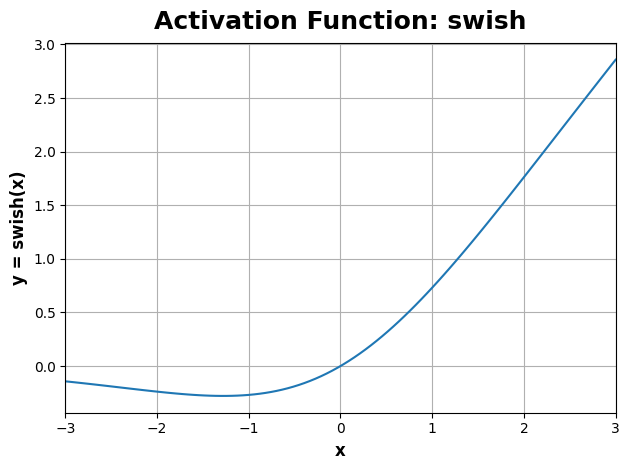

In [13]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

func = 'swish' # Change to: 'relu' 'elu', 'selu', 'swish'... or something else
activation_layer = layers.Activation(func)

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.grid(which='major')
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.title('Activation Function: ' + func)
plt.xlabel('x')
plt.ylabel('y = ' + func + '(x)')
plt.show()

### Sigmoid Activation - Classification Layers

In order to produce classification predictions, the neural network needs a function to ultimately represent probabilities (of class) rather than some other type of real-number output. For instance, if there are 3 classes: "dog", "cat" and "bird", we may select as final layer `layers.Dense(3)` to produce 3 values for each class. Yet, these values would not be useful in determining the correct classification for a given input (e.g., What class should be assign an output with a high value for "dog", but an even greater _negative_ value for "cat"?). However, if we _activate_ these values with a sigmoid function $\left( \text{i.e., }f(x) = \frac{1}{1+e^x}\right)$ to produce values for each class on the probabilistic scale, $[0,1]$. These predicted values may then be used in a probabilistic loss function, such as _cross entropy_.

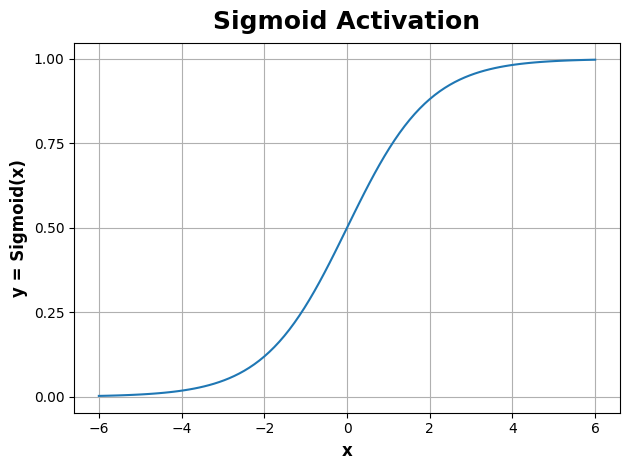

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

# Create a dataframe of x and y values
activation_layer = layers.Activation('sigmoid')
df = pd.DataFrame({'x': tf.linspace(-6, 6, 100)})
df['y'] = activation_layer(df['x']) # once created, a layer is callable just like a function

# Plot the sigmoid graph
plt.plot(df['x'], df['y'])
plt.grid(which='major')
plt.yticks(ticks=[0.0, 0.25, 0.5, 0.75, 1.0])
plt.xlabel('x')
plt.ylabel('y = Sigmoid(x)')
plt.title('Sigmoid Activation')
plt.show()

If a final class prediction is desired (rather than a raw probability), we define a _threshold_ for each predicted probability. Typically, this is $p_t=0.5$ but may be adjusted based on the relative consequences of false positives vs. false negatives.

## Other Layers

- `tf.keras.Input(<shape>)`: Preferred over specifying input `shape` in the first layer

# Loss Functions

A measurement of how "good" a neural network's (or any ML algorithm's) predictions are. Loss functions tell the network what problem to solve. More precisely, it measures the difference between a target's true value and a value the model predicts.

For a TensorFlow `model`, the loss function is set by the `.compile(loss=<func>)` method.

Loss functions in TensorFlow include:

- `'mae'`: Mean absolute error
- `'mse'`: Mean squared error

## Cross Entropy

Cross entropy (AKA "log loss") provides a loss function that measures the distance between probabilities. In _binary classification_, where the number of classes is $M = 2$, cross-entropy can be calculated as:

$$
−(y_i\ln(\hat{p_i})+(1−y_i)\ln(1−\hat{p_i}))
$$

Where $y_i$ is a _binary indicator_ of whether the binary class is of the first type or the second, and $\hat{p}_i$ is the predicted probability of such, each for observation $i$. If $M>2$ (i.e., _multi-classification), we calculate a separate loss for each class label per observation and sum the result:

$$
-\sum_{c=1}^My_{i,c}\ln(\hat{p}_{i,c})
$$

- $M$ is the number of classes
- $y_{i,c}$ is a binary indicator ($\{0, 1\}$) for observation $i$ regarding class $c$
- $\hat{p}_{i,c}$ is the predicted probability that observation $i$ is of class $c$.

Ideally, our network will predict the correct class with probability 1.0. The further away the predicted probability is from 1.0, the greater will be the cross-entropy loss.

Using a loss function such as cross entropy in classification problems is partially motivated by a difficulty in using as a loss functions the more basic measures of classification performance: accuracy, recall and precision. SGD _requires_ a smooth loss function. Yet, these performance metrics change in "jumps" due to the whole number fractions being calculated in each. And besides, these metrics _tend_ to improve with a performance improvment in log-loss.

The following is a binary classification problem using a cross entropy loss function.

Best Validation Loss: 0.3378
Best Validation Accuracy: 0.8667


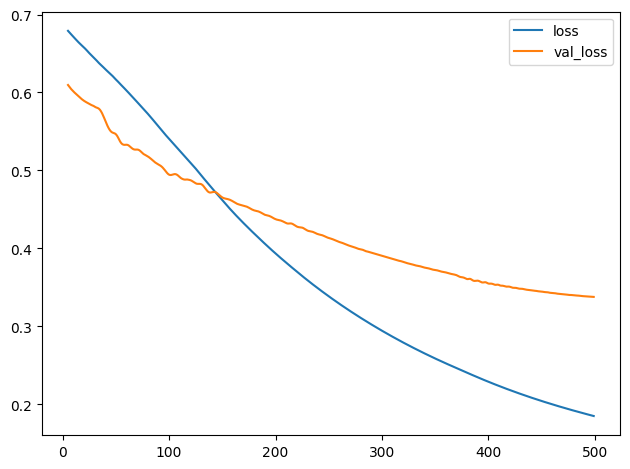

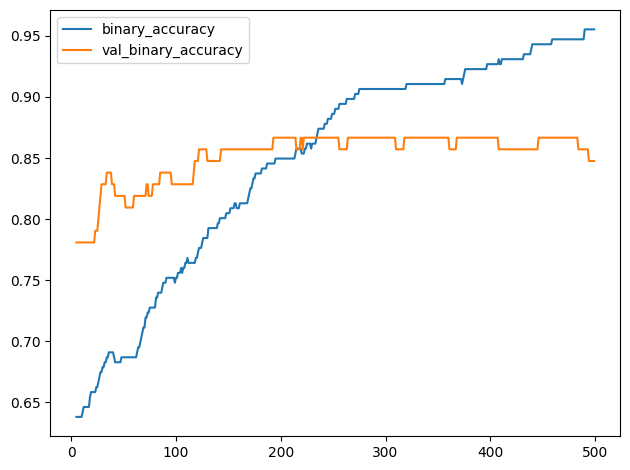

In [17]:
from tensorflow import keras
from tensorflow.keras import layers

#Modelling
model = keras.Sequential([
    layers.Input(shape=[33])
    , layers.Dense(4, activation='relu')
    , layers.Dense(4, activation='relu')
    , layers.Dense(1, activation='sigmoid') #To produce class probabilities
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', #Note that multi-classification problems will use a different loss function
    metrics=['binary_accuracy'],
)

#Results
##Note that this training may take some time
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train_ion, y_train_ion,
    validation_data=(X_valid_ion, y_valid_ion),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

# Optimizers & Stochastic Gradient Descent

If loss functions describe what problem must be solved, the optimizer describes how to solve it. In a neural network, the optimizer adjusts the neural unit weights to minimize loss.

**Virtually all optimizers in deep learning belong to a family of algorithms called _Stochastic Gradient Descent_ (SGD)**. _Stochastic_ means determined by chance, as the batches of training data are determined by random selection. A _gradient_ is a directional vector indicating the slope of the loss curve in neural weight space, and _descent_ indicates the optimizer is looking for a minimum loss in that space.

SGD training steps go like this:

1. Sample some training data (i.e., a _minibatch_, or just _batch_) and run it through the network to make predictions.
2. Measure the loss between the predictions and the true values.
3. Finally, adjust the weights in a direction that makes the loss smaller.
4. Repeat!

This algorithm is repeated until the loss is sufficiently small, or will not meaningfully decrease any further.

Once all the training data has been passed through SGD training steps broken up into batches, it is said that an _epoch_ has passed. The number of epochs in training equals the number of times the neural network will see each training example.

After defining a model, you can add a loss function and optimizer with the model's `compile` method:

In [15]:
model.compile(
    optimizer="adam",
    loss="mae",
)

## Learning Rate

Each batch leads to a small shift along the gradient towards decreased loss. The size of this shift is called the _learning rate_. A smaller learning rate means the network needs to see more minibatches before it's weights converge on their optimal values. The learning rate along with the batch size (see below) are the hyperparameters with the most impact on how SGD training proceeds. Their interaction is subtle and the correct choice is not always obvious. Fortunately, for most work an extensive hyperparameter search will not be necessary to get satisfactory results.

## Batch Size

The number of samples passed per training round, each used to update the weights in a neural network in the direction of the gradient of the loss function in terms or its weights. The size of the batch affects how quickly the model is trained, as well as how noisy the loss curve is.

Use the following animation tool to explore the relationship between learning rate & batch size.

In [23]:
learning_rate = 0.05
batch_size = 32
num_examples = 256

# animate_sgd(
#     learning_rate=learning_rate,
#     batch_size=batch_size,
#     num_examples=num_examples,
#     # You can also change these, if you like
#     steps=50, # total training steps (batches seen)
#     true_w=3.0, # the slope of the data
#     true_b=2.0, # the bias of the data
# )

## Adam the SGD Algorithm

Meet _Adam_. Adam has an _adaptive_ learning rate that makes it suitable for most problems without any parameter tuning (i.e., it is self-tuning). This makes Adam a great general-purpose optimizer.

Below is an example using Adam SGD.

In [26]:
# Wine Quality Prediction
from tensorflow import keras
from tensorflow.keras import layers

## Model Setup
model = keras.Sequential([
    Input(shape=[11])
    , layers.Dense(512, activation='relu')
    , layers.Dense(512, activation='relu')
    , layers.Dense(512, activation='relu')
    , layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)

## Fitting
X_train = wine_train.drop('quality', axis=1)
y_train = wine_train['quality']
X_valid = wine_valid.drop('quality', axis=1)
y_valid = wine_valid['quality']

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3328 - val_loss: 0.1393
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1366 - val_loss: 0.1211
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1223 - val_loss: 0.1131
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1159 - val_loss: 0.1070
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1117 - val_loss: 0.1066
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1061 - val_loss: 0.1027
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1050 - val_loss: 0.1037
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1050 - val_loss: 0.1151
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1079 - val_loss: 0.0987
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1016 - val_loss: 0.0988
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0996 - val_loss: 0.1026
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0984 - val_loss: 0.0994


We can view the decrease in loss across epochs on a graph:

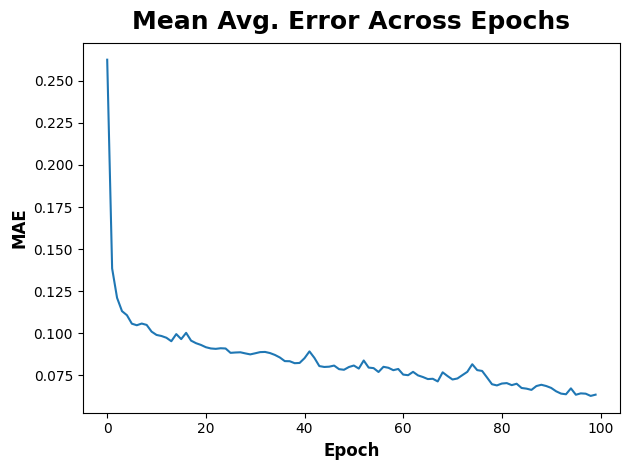

In [27]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot(title='Mean Avg. Error Across Epochs'
    , xlabel='Epoch'
    , ylabel='MAE');

# Model Fit - The Signal or the Noise?

You might think about the information in the training data as being of two kinds: _signal_ and _noise_. The _signal_ is the part that generalizes; the part that can help our model make predictions about new data. The _noise_ is that part that is only true of the training data; the noise is all of the random fluctuation that comes from all of the incidental, non-informative patterns that can't actually help the model make predictions. We want the neural network to identify the signal, and nothing more!

This trade-off indicates that there can be two problems that occur when training a model: not enough signal or too much noise. _Underfitting_ the training set is when the loss is not as low as it could be because the model hasn't learned enough signal. _Overfitting_ the training set is when the loss is not as low as it could be because the model learned too much noise. The trick to training deep learning models is finding the best balance between the two.

<img src='IMAGES/underfit_overfit.png'>

## Learning Curves

During model training, the optimizer adjusts network model weights in order to reduce loss in the training data. This reduction in loss across epochs on a set of data is called a _learning curve_, and specifically a _training learning curve_ for the loss on a training set. However, ultimately the model must peform optimally on _unseen_ data. Hence, another learning curve may be calculated across epochs for an unseen _validation set_. This curve will specifically be called the _validation learning curve_.

At first in training, overall loss falls in both the training and validation learning curves from epoch to epoch. During these early epochs the network is _underfit_ and continuing to to learn signal from the training data that enables it to reduce loss in the validation data. However, eventually the neurons will begin to learn noise in the training data. The network will begin to pick up all the idiosyncracies that are unique to the training data but not generalizable to new data. This is called _overfitting_.

While the training learning curve will continue to decrease with signal _or_ noise in the training set, the validation learning curve will instead begin to increase in loss as epochs pass.

<img src='IMAGES/learning curves.png'>

A sign that the network is underfit is if the validation loss never significantly rises regardless of epoch count. Take the following as an example:

Minimum Validation Loss: 0.1998


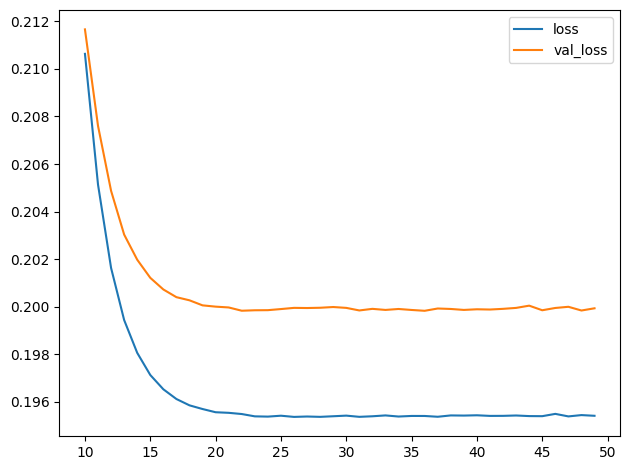

In [31]:
model = keras.Sequential([
    Input(shape=[X_train__spot.shape[1]])
    , layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train__spot, y_train__spot,
    validation_data=(X_valid__spot, y_valid__spot),
    batch_size=512,
    epochs=50,
    verbose=0, # suppress output since we'll plot the curves
)
history_df = pd.DataFrame(history.history)
history_df.loc[10:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

## Network Capacity

A model's _capacity_ refers to the size and complexity of the patterns it is able to learn. For neural networks, this will largely be determined by how many neurons it has and how they are connected together. If it appears that your network is _underfitting_ the data, you should try increasing its capacity.

You can increase the capacity of a network in 2 ways: by making existing layers _wider_, or by making the network _deeper_.

- __Layer Width__: number of neural units in a given layer
- __Network Depth__: number of neural layers

Wider networks have an easier time learning more linear relationships, while deeper networks prefer more nonlinear ones. Which is better just depends on the dataset.


In [32]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

wider = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(1),
])

deeper = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

## Early Stopping

When a model is too eagerly learning noise, the validation loss may start to increase during training. To prevent this, we can simply stop the training whenever it seems the validation loss isn't decreasing anymore. Interrupting the training this way is called _early stopping_.

<img src='IMAGES/early stopping.png'>

Once we detect that the validation loss is starting to rise again, we can reset the weights back to where the minimum occured. This ensures that the model won't continue to learn noise and overfit the data.

Training with early stopping also means that we are in less danger of stopping the training too early, before the network has finished learning signal. So besides preventing overfitting from training too long, early stopping can also prevent underfitting from not training long enough. The training epochs must merely be set to some large number greater than needed, and early stopping will take care of the rest.

Minimum validation loss: 0.09023018926382065


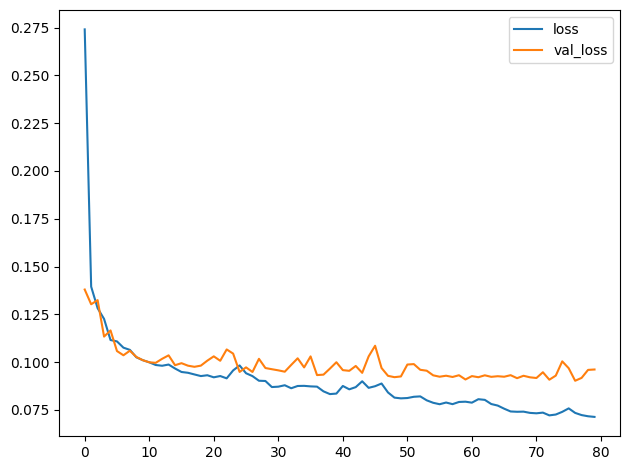

In [35]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

#Early stopping callback
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

#Data
X_train = wine_train.drop('quality', axis=1)
X_valid = wine_valid.drop('quality', axis=1)
y_train = wine_train['quality']
y_valid = wine_valid['quality']

#Model
model = keras.Sequential([
    Input(shape=[11])
    , layers.Dense(512, activation='relu')
    , layers.Dense(512, activation='relu')
    , layers.Dense(512, activation='relu')
    , layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)

#Fitting
history = model.fit(
    X_train, y_train
    , validation_data=(X_valid, y_valid)
    , batch_size=256
    , epochs=500 # note that the actual epochs will be well below this
    , callbacks=[early_stopping] # put your callbacks in a list
    , verbose=0 # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

## Drop-Out Layers

As mentioned above, drop-out layers can reduce overfitting risk by making it more difficult for the network to learn noise in the data. The following is a rehash of the above modelling. However, this time the model is wider, which means it could be more likely to overfit the training data. This is compensated for by the inclusion of [`Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) layers.

Minimum validation loss: 0.09534753859043121


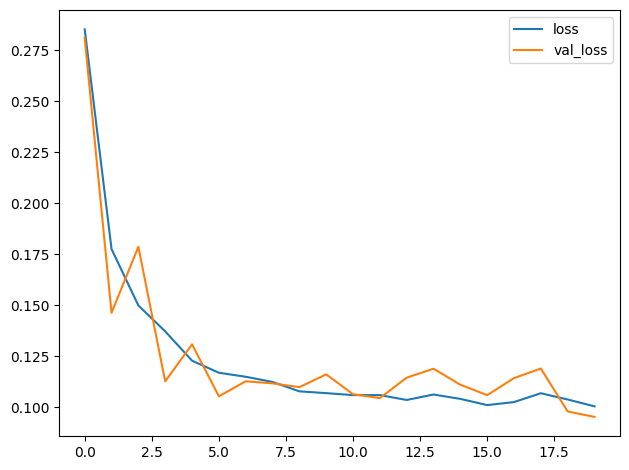

In [36]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    Input(shape=[11])
    , layers.Dense(1024, activation='relu')
    , layers.Dropout(0.3)
    , layers.Dense(1024, activation='relu')
    , layers.Dropout(0.3)
    , layers.Dense(1024, activation='relu')
    , layers.Dropout(0.3)
    , layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, y_train
    , validation_data=(X_valid, y_valid)
    , batch_size=256
    , epochs=100
    , callbacks=[early_stopping]
    , verbose=0
)

# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

# Callbacks

Functions that we want to run every so often during training. `callbacks` are passed to the TF `fit()` method.

- `EarlyStopping(<min_delta>, <patience>, <restore_best_weights>)`: Stop training within `patience` epochs if the best loss score has not at least improved by `min_delta`. If `restore_best_weights` is set to `True`, then (as it sounds), the weights from the best epoch are restored to the trained model.

# Linear Algebra Commands

* `add(<tensor1>, <tensor2>)` - Adds tensors of equal dimensions.
* `assign(<name>, <operation()>)` - Assign (update) a previously defined and mutable tensor object with a given operation. E.g., `assign(total, add(total, weights)` assigns `total` the sum of itself and `weights`.
* `constant` - A constant (immutable) tensor, e.g., `constant(1.0, shape = [4]).eval()`, creates a 1st-order tensor in a Numpy array `[1.0, 1.0, 1.0, 1.0]`.
* `matmul(<tensor1>, <tensor2>)` - Multiply two tensors with equal dimensions
* `random_un`: ?
* `zeros(<shape>)` - create a constant `<shape>` tensor of zeros. E.g., `zeros([1, 2]).eval()` creates a Numpy array of `[0, 0]`.

# Data Type Placeholders

* `constant(<val>, shape=<(...,)>)` - A constant (immutable) tensor, e.g., `constant(1.0, shape = [4]).eval()`, creates a 1st-order tensor in a Numpy array `[1.0, 1.0, 1.0, 1.0]`.
* `placeholder(<type>, shape=<(...)>)` - create a namespace for a variable.
* `Variable(<tensor>)` - Create a mutable tensor, e.g., `Variable(zeros([1, 2]))` creates a (placeholder) for a mutable tensor of `0`s. Variables must be initialized with `global_variables_initializer().run()`.

# Tensorboard

Run with `tensorboard --logdir <dir>`, run TensorBoard with a directory to save graphs.


# Acks & Refs

- Kaggle - Intro to Deep Learning: [https://www.kaggle.com/learn/intro-to-deep-learning](https://www.kaggle.com/learn/intro-to-deep-learning)
- Ionosphere Radar Data: [https://archive.ics.uci.edu/dataset/52/ionosphere](https://archive.ics.uci.edu/dataset/52/ionosphere)